In [285]:
import matplotlib.pyplot as plt

In [286]:
import pandas as pd
df = pd.read_csv('data/idpPop_2016.csv', delimiter=";")
headers = df.iloc[0].values
df.columns = headers
df.drop(index=0, axis=0, inplace=True)
df = df[['Governorate','Total 2016']]
df.drop(index=df.index[-1],axis=0,inplace=True)
df = df.rename(columns={'Governorate': 'Region', 'Total 2016': 'IDPs'})


## Total of IDP arrivals per governorate in Syria in the year 2016

C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\2833717833.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['IDPs'] = df['IDPs'].str.replace('.', '')


<AxesSubplot:xlabel='Region'>

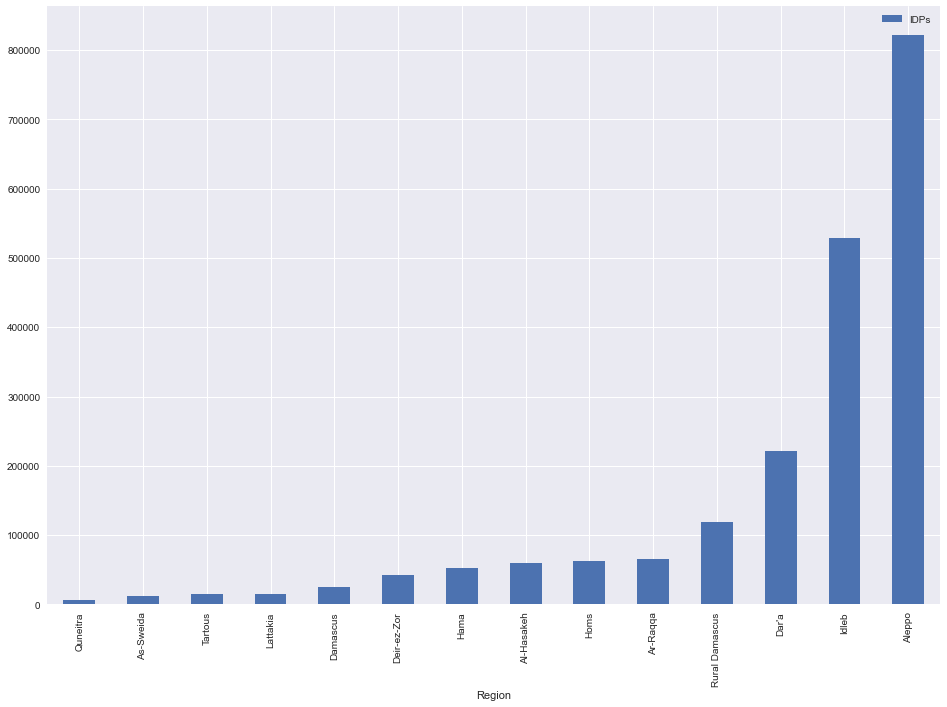

In [287]:
df['IDPs'] = df['IDPs'].str.replace('.', '')
df.IDPs = df.IDPs.astype(int)
df = df.sort_values('IDPs')
df.plot.bar(x='Region', y='IDPs')

In [288]:
#df.to_csv('idp_pop_2016.csv')

# Data from January 2017
## Available data: IDP arrival numbers per governorate

In [289]:
df2 = pd.read_csv('data/idpFlow_jan2017.csv', delimiter=";")
df2 = df2[['D_Governorate','Estimated IDP Arrivals']]
df2 = df2.dropna(axis=0)


C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\3636323622.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/idpFlow_jan2017.csv', delimiter=";")


## Bar chart showing total of IDP arrivals per governorate in Syria in January 2017

<AxesSubplot:xlabel='Region'>

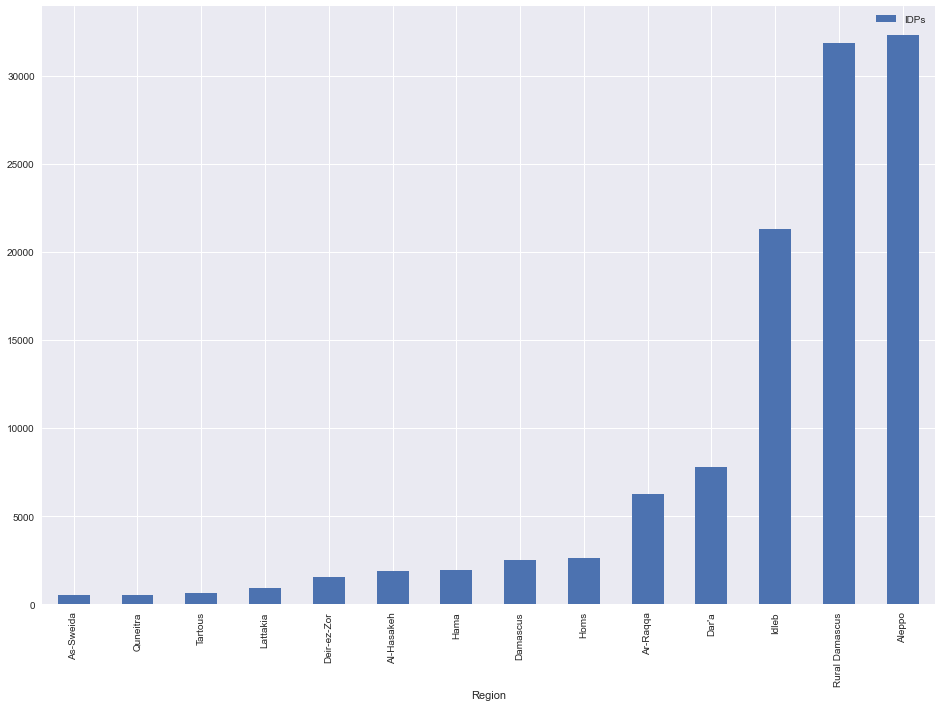

In [290]:
df2 = df2.rename(columns={'D_Governorate': 'Region', 'Estimated IDP Arrivals': 'IDPs'})
df2.IDPs = df2.IDPs.astype(int)
df2 = df2.groupby(["Region"])["IDPs"].sum().reset_index()
df2 = df2.sort_values('IDPs')
df2.plot.bar(x='Region', y='IDPs')

# Data from February 2017
## Available data: IDP arrival numbers per governorate

In [291]:
df3 = pd.read_csv('data/idpFlow_feb2017.csv', delimiter=";")
df3 = df3[['D_Governorate','IDP_Flow_Estimation']]
df3 = df3.dropna(axis=0)


## Bar chart showing total of IDP arrivals per governorate in Syria in February 2017

<AxesSubplot:xlabel='Region'>

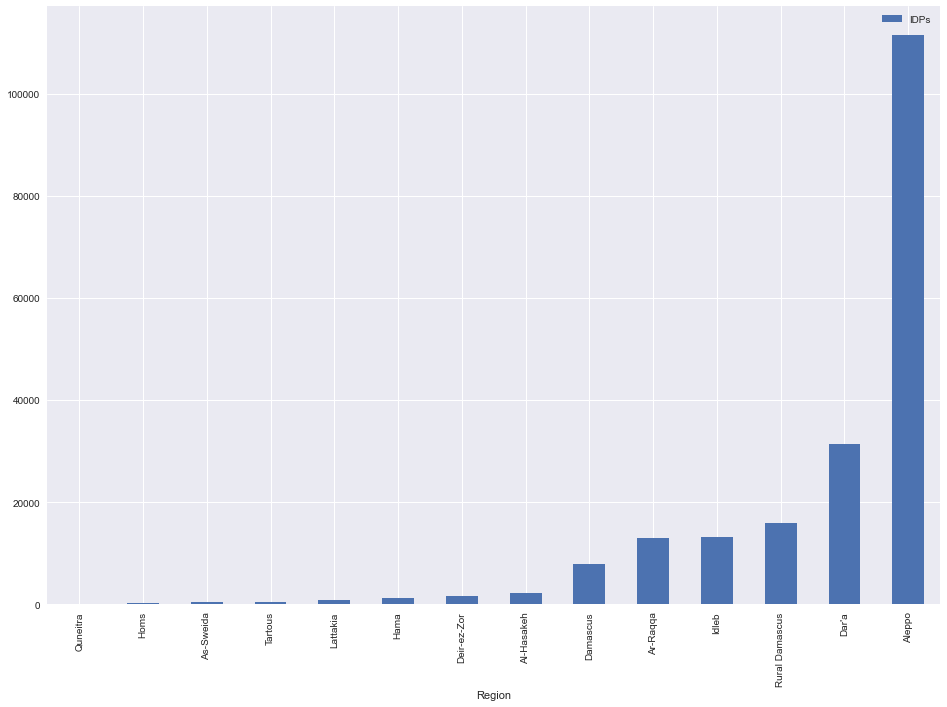

In [292]:
df3 = df3.rename(columns={'D_Governorate': 'Region', 'IDP_Flow_Estimation': 'IDPs'})
df3.IDPs = df3.IDPs.astype(int)
df3 = df3.groupby(["Region"])["IDPs"].sum().reset_index()
df3 = df3.sort_values('IDPs')
df3.plot.bar(x='Region', y='IDPs')

# Data from March 2017
## Available data: Number of IDP arrivals per governorate including their origin location
## Question answeared from data:
### 1. Where do most IDPs come from?
### 2. Where do most IDPs go to?
### 3. Which are the most common routes of IDPs?

In [293]:
df4 = pd.read_csv('data/idpRoutes_mar2017.CSV', delimiter=";")

In [294]:
# Clean data
df4 = df4.fillna(0)
df4 = df4.astype(str)
cols = list(df4.columns)
cols.pop(0)

for col in cols:
    df4[col] = df4[col].str.replace('.', '')
    df4[col] = df4[col].str.replace('00', '0')
    df4[col] = df4[col].astype(int)
    
df4    


C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\1924020089.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4[col] = df4[col].str.replace('.', '')


,From,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous,Total
0,Aleppo,148593,1522,3875,0,140,0,210,770,270,7136,0,0,1230,710,161459
1,Al-Hasakeh,830,5540,0,150,450,0,1190,0,160,0,0,0,0,40,8360
2,Ar-Raqqa,1343,4426,33641,250,30,0,7520,1050,0,330,0,0,250,0,40875
3,As-Sweida,0,0,0,870,0,0,180,0,0,0,0,0,0,0,1050
4,Damascus,1860,0,0,1850,2514,0,0,1980,0,5520,350,0,1329,290,16989
5,Dar'a,130,0,0,1030,120,50,120,0,0,1020,0,0,0,0,2920
6,Deir-ez-Zor,7750,490,0,520,480,0,9640,10,0,30,10,0,250,140,1977
7,Hama,820,0,0,0,1010,0,0,24927,2272,11184,250,0,0,2942,41758
8,Homs,3331,0,0,410,970,160,80,3750,470,2070,20,0,0,90,4574
9,Idleb,9910,0,0,550,160,0,0,1080,0,467,50,0,0,140,5904


## Where do most IDPs come from in March 2017?

<AxesSubplot:xlabel='From'>

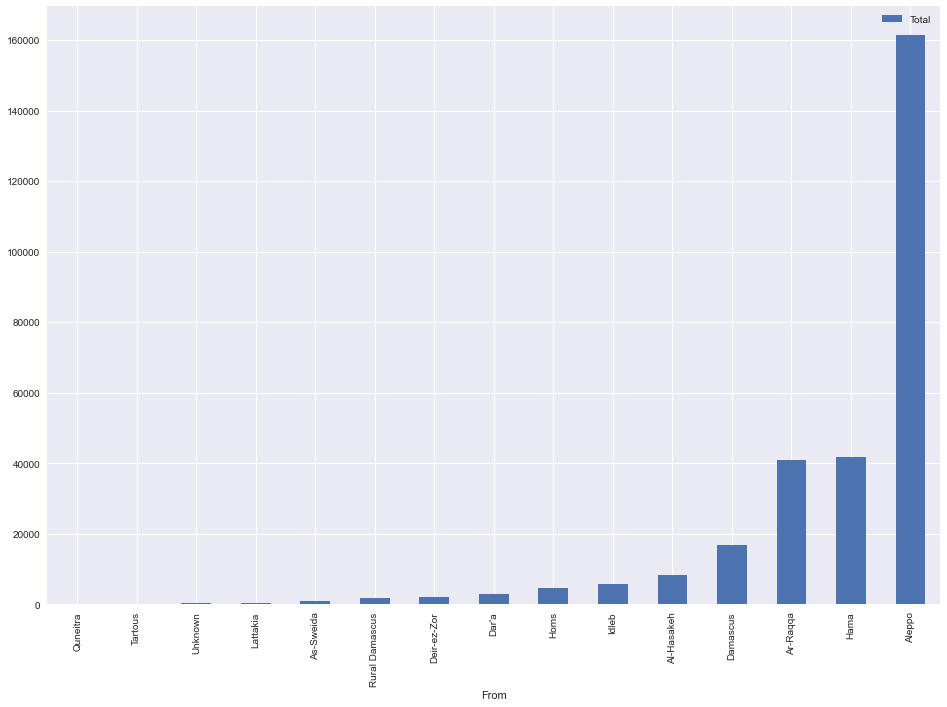

In [329]:
df4_drop_last_row = df4[:-1]
df4_origin_numbers = df4_drop_last_row.loc[:, ['From','Total']] 
df4_origin_numbers.sort_values('Total').plot.bar(x='From', y='Total')

### From Aleppo

## Where do most IDPs go to in March 2017?

<AxesSubplot:>

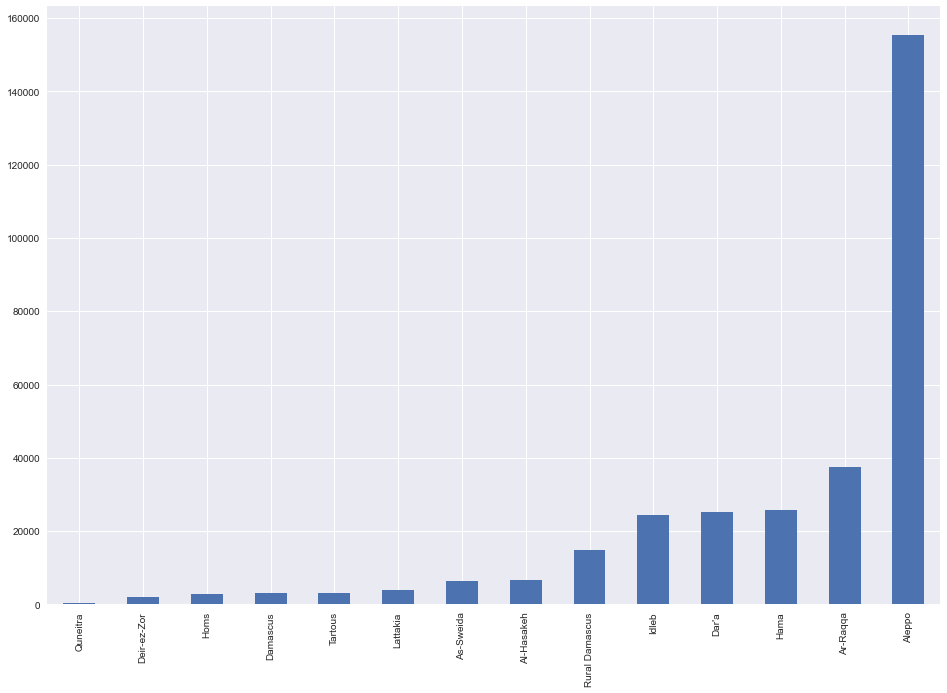

In [317]:
df4_drop_cols = df4[df4.columns[:-1]]
df4_drop_cols = df4_drop_cols[df4_drop_cols.columns[1:]]



total_arrivals_row = df4_drop_cols.iloc[-1]
total_arrivals_row.sort_values().plot.bar()


### To Aleppo

## IDP Routes March 2017

In [297]:
df4_drop_totals_and_cols = df4_drop_cols[:-1]
df4_drop_totals_and_cols

,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous
0,148593,1522,3875,0,140,0,210,770,270,7136,0,0,1230,710
1,830,5540,0,150,450,0,1190,0,160,0,0,0,0,40
2,1343,4426,33641,250,30,0,7520,1050,0,330,0,0,250,0
3,0,0,0,870,0,0,180,0,0,0,0,0,0,0
4,1860,0,0,1850,2514,0,0,1980,0,5520,350,0,1329,290
5,130,0,0,1030,120,50,120,0,0,1020,0,0,0,0
6,7750,490,0,520,480,0,9640,10,0,30,10,0,250,140
7,820,0,0,0,1010,0,0,24927,2272,11184,250,0,0,2942
8,3331,0,0,410,970,160,80,3750,470,2070,20,0,0,90
9,9910,0,0,550,160,0,0,1080,0,467,50,0,0,140


In [298]:
df4_max = df4_drop_totals_and_cols
df4_max['max']= df4_max.max(axis=1)
df4_max
max_col = df4_max['max']

C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\1899947324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_max['max']= df4_max.max(axis=1)


In [299]:
df4_drop_totals_and_cols = df4_drop_totals_and_cols[df4_drop_totals_and_cols.columns[:-1]]
df4_drop_totals_and_cols

,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous
0,148593,1522,3875,0,140,0,210,770,270,7136,0,0,1230,710
1,830,5540,0,150,450,0,1190,0,160,0,0,0,0,40
2,1343,4426,33641,250,30,0,7520,1050,0,330,0,0,250,0
3,0,0,0,870,0,0,180,0,0,0,0,0,0,0
4,1860,0,0,1850,2514,0,0,1980,0,5520,350,0,1329,290
5,130,0,0,1030,120,50,120,0,0,1020,0,0,0,0
6,7750,490,0,520,480,0,9640,10,0,30,10,0,250,140
7,820,0,0,0,1010,0,0,24927,2272,11184,250,0,0,2942
8,3331,0,0,410,970,160,80,3750,470,2070,20,0,0,90
9,9910,0,0,550,160,0,0,1080,0,467,50,0,0,140


## What is the most common destination when originating from each governorate in March 2017?

In [311]:
# Needed is a list of lists
# Each list has format [OriginName, DestinationName, Number]

data = []
for row_idx, row in df4_drop_totals_and_cols.iterrows():
    temp = []
    temp.append(df4['From'][row_idx])
    temp.append(row[row==max_col[row_idx]].index[0])
    temp.append(max_col[row_idx])
    data.append(temp)
    

    
df_idp_routes = pd.DataFrame(data, columns=['Origin', 'Destination', 'Number'])    
df_idp_routes.sort_values('Number', ascending=False).reset_index(inplace=True)

# Prepare data to be shown on map: Remove Unknown Origin!
top_20_routes = df_idp_routes.nlargest(14, 'Number').reset_index()
top_20_routes = top_20_routes.drop(top_20_routes[top_20_routes['Origin']=='Unknown' ].index)
top_20_routes

,index,Origin,Destination,Number
0,0,Aleppo,Aleppo,148593
1,2,Ar-Raqqa,Ar-Raqqa,33641
2,7,Hama,Hama,24927
3,9,Idleb,Aleppo,9910
4,6,Deir-ez-Zor,Deir-ez-Zor,9640
5,1,Al-Hasakeh,Al-Hasakeh,5540
6,4,Damascus,Idleb,5520
7,8,Homs,Hama,3750
8,12,Rural Damascus,Idleb,3180
10,5,Dar'a,As-Sweida,1030


### The above table shows the most common destination for each governorate in March 2017 as well as the number of IDP arrivals for each route.

### Routes with the same origin and destinations represent returnees

# 

## Show most common Syrian IDP routes of March 2017 on map
### Green dots without lines represent governorates whose IDP arrivals are returnees

In [331]:
import geopandas as gpd
df2 = gpd.read_file('data/syrian_districts_1.geojson')
df2.rename(columns = {'ADM1_EN':'Region'}, inplace = True)

C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\4042359697.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\4042359697.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]


[1    36.218085
dtype: float64, 2    36.01153
dtype: float64, 7    35.220921
dtype: float64, 9    35.785113
dtype: float64, 6    35.130065
dtype: float64, 0    36.491475
dtype: float64, 4    33.515687
dtype: float64, 8    34.469832
dtype: float64, 12    33.492022
dtype: float64, 5    32.856493
dtype: float64, 13    34.959426
dtype: float64, 3    32.74857
dtype: float64, 10    35.575297
dtype: float64]


C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\4042359697.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\4042359697.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]


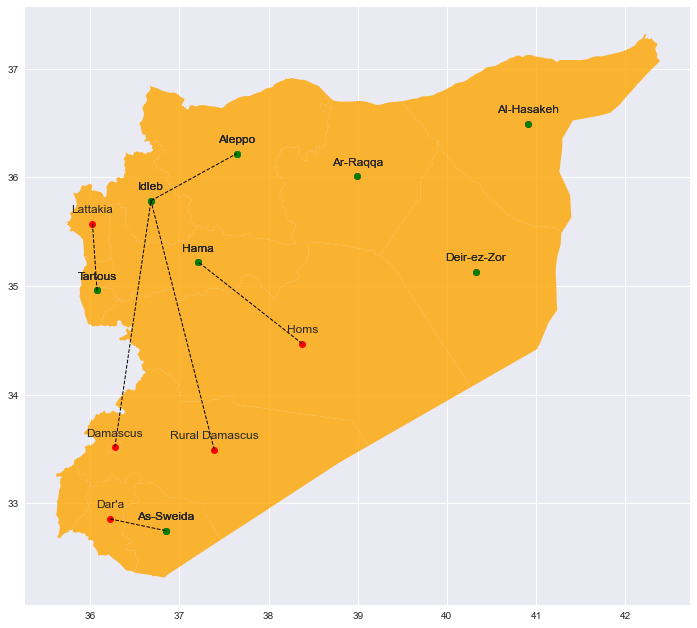

In [313]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
print(y_values_origins)
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )


for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")

# Data from April 2017
## Available data: Number of IDP arrivals per governorate including their origin location
## Question answeared from data:
### 1. Where do most IDPs come from?
### 2. Where do most IDPs go to?
### 3. Which are the most common routes of IDPs?

In [265]:
df5 = pd.read_csv('data/idpRoutes_april2017.CSV', delimiter=";")
df5 = df5[df5.columns[:-1]]
df5 = df5[df5['From'].notna()]
df5

,From,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous,Total
0,Aleppo,17.594,415.000,16.678,NaN,17.000,NaN,10.000,162.000,NaN,3.802,NaN,NaN,17.000,105.000,38.800
1,Al-Hasakeh,NaN,6.174,NaN,NaN,102.000,NaN,71.000,NaN,39.000,NaN,NaN,NaN,NaN,24.000,6.409
2,Ar-Raqqa,1.469,1.451,87.885,NaN,NaN,NaN,1.446,285.000,26.000,933.000,NaN,NaN,2.935,NaN,96.430
3,As-Sweida,NaN,NaN,NaN,544.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544.000
4,Damascus,NaN,NaN,NaN,92.000,1.045,NaN,NaN,NaN,NaN,8.000,NaN,NaN,406.000,66.000,1.617
5,Dar'a,NaN,NaN,NaN,274.000,NaN,12.858,NaN,NaN,NaN,38.000,NaN,419.000,31.000,NaN,13.620
6,Deir-ez-Zor,NaN,2.222,NaN,55.000,106.000,NaN,2.065,NaN,NaN,93.000,NaN,NaN,NaN,38.000,4.580
7,Hama,190.000,NaN,2.000,NaN,6.000,NaN,NaN,273.000,34.000,3.732,109.000,NaN,4.000,92.000,4.443
8,Homs,3.689,NaN,NaN,14.000,2.000,NaN,NaN,195.000,314.000,2.643,NaN,NaN,31.000,11.000,6.898
9,Idleb,9.330,NaN,NaN,9.000,29.000,NaN,NaN,1.035,11.000,41.852,3.059,NaN,1.263,721.000,68.298


In [266]:
# Clean data
df5 = df5.fillna(0)
df5 = df5.astype(str)
cols = list(df5.columns)
cols.pop(0)

for col in cols:
    df5[col] = df5[col].str.replace('.', '')
    df5[col] = df5[col].str.replace('00', '0')
    df5[col] = df5[col].astype(int)
    
df5    


C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\2343349476.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5[col] = df5[col].str.replace('.', '')


,From,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous,Total
0,Aleppo,17594,4150,16678,0,170,0,10,1620,0,3802,0,0,170,1050,388
1,Al-Hasakeh,0,6174,0,0,1020,0,710,0,390,0,0,0,0,240,6409
2,Ar-Raqqa,1469,1451,87885,0,0,0,1446,2850,260,9330,0,0,2935,0,9643
3,As-Sweida,0,0,0,5440,0,0,0,0,0,0,0,0,0,0,5440
4,Damascus,0,0,0,920,1045,0,0,0,0,80,0,0,4060,660,1617
5,Dar'a,0,0,0,2740,0,12858,0,0,0,380,0,4190,310,0,1362
6,Deir-ez-Zor,0,2222,0,550,1060,0,2065,0,0,930,0,0,0,380,458
7,Hama,190,0,20,0,60,0,0,2730,340,3732,1090,0,40,920,4443
8,Homs,3689,0,0,140,20,0,0,1950,3140,2643,0,0,310,110,6898
9,Idleb,933,0,0,90,290,0,0,1035,110,41852,3059,0,1263,7210,68298


## Where do most IDPs come from in April 2017?

<AxesSubplot:xlabel='From'>

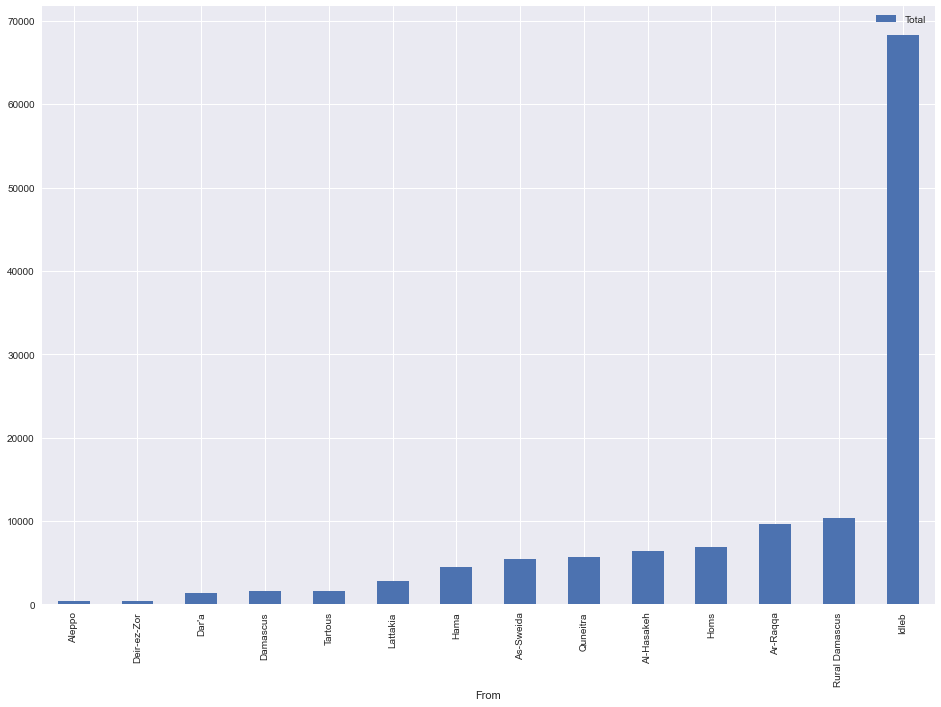

In [330]:
df5_drop_last_row = df5[:-1]
df5_drop_last_row = df5[:-1]
df5_origin_numbers = df5_drop_last_row.loc[:, ['From','Total']] 
df5_origin_numbers.sort_values('Total').plot.bar(x='From', y='Total')

### From Idleb

## Where do most IDPs go to in April 2017?

In [268]:
df5_drop_cols = df5[df5.columns[:-1]]
df5_drop_cols = df5_drop_cols[df5_drop_cols.columns[1:]]



total_arrivals_row = df5_drop_cols.iloc[-1]
total_arrivals_row.


'Ar-Raqqa'

### To Ar-Raqqa

## IDP Routes April 2017

In [269]:
df5_drop_totals_and_cols = df5_drop_cols[:-1]
df5_drop_totals_and_cols

,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous
0,17594,4150,16678,0,170,0,10,1620,0,3802,0,0,170,1050
1,0,6174,0,0,1020,0,710,0,390,0,0,0,0,240
2,1469,1451,87885,0,0,0,1446,2850,260,9330,0,0,2935,0
3,0,0,0,5440,0,0,0,0,0,0,0,0,0,0
4,0,0,0,920,1045,0,0,0,0,80,0,0,4060,660
5,0,0,0,2740,0,12858,0,0,0,380,0,4190,310,0
6,0,2222,0,550,1060,0,2065,0,0,930,0,0,0,380
7,190,0,20,0,60,0,0,2730,340,3732,1090,0,40,920
8,3689,0,0,140,20,0,0,1950,3140,2643,0,0,310,110
9,933,0,0,90,290,0,0,1035,110,41852,3059,0,1263,7210


In [270]:
df5_max = df5_drop_totals_and_cols
df5_max['max']= df5_max.max(axis=1)
df5_max
max_col = df5_max['max']

C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\3803448889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_max['max']= df5_max.max(axis=1)


In [271]:
df5_drop_totals_and_cols = df5_drop_totals_and_cols[df5_drop_totals_and_cols.columns[:-1]]
df5_drop_totals_and_cols

,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous
0,17594,4150,16678,0,170,0,10,1620,0,3802,0,0,170,1050
1,0,6174,0,0,1020,0,710,0,390,0,0,0,0,240
2,1469,1451,87885,0,0,0,1446,2850,260,9330,0,0,2935,0
3,0,0,0,5440,0,0,0,0,0,0,0,0,0,0
4,0,0,0,920,1045,0,0,0,0,80,0,0,4060,660
5,0,0,0,2740,0,12858,0,0,0,380,0,4190,310,0
6,0,2222,0,550,1060,0,2065,0,0,930,0,0,0,380
7,190,0,20,0,60,0,0,2730,340,3732,1090,0,40,920
8,3689,0,0,140,20,0,0,1950,3140,2643,0,0,310,110
9,933,0,0,90,290,0,0,1035,110,41852,3059,0,1263,7210


## What is the most common destination when originating from each governorate in April 2017?

In [276]:
# Needed is a list of lists
# Each list has format [OriginName, DestinationName, Number]

data = []
for row_idx, row in df5_drop_totals_and_cols.iterrows():
    temp = []
    temp.append(df5['From'][row_idx])
    temp.append(row[row==max_col[row_idx]].index[0])
    temp.append(max_col[row_idx])
    data.append(temp)
    

    
df_idp_routes = pd.DataFrame(data, columns=['Origin', 'Destination', 'Number'])    
df_idp_routes.sort_values('Number', ascending=False)
top_20_routes = df_idp_routes.nlargest(13, 'Number').reset_index()
top_20_routes

,index,Origin,Destination,Number
0,2,Ar-Raqqa,Ar-Raqqa,87885
1,9,Idleb,Idleb,41852
2,0,Aleppo,Aleppo,17594
3,5,Dar'a,Dar'a,12858
4,1,Al-Hasakeh,Al-Hasakeh,6174
5,11,Quneitra,Quneitra,5728
6,3,As-Sweida,As-Sweida,5440
7,4,Damascus,Rural Damascus,4060
8,7,Hama,Idleb,3732
9,8,Homs,Aleppo,3689


### The above table shows the most common destination for each governorate in April 2017 as well as the number of IDP arrivals for each route.

### Routes with the same origin and destinations represent returnees

C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\647766417.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\647766417.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
C:\Users\vivia\AppData\Local\Temp\ipykernel_17884\647766417.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_values_destinations =  [df2.loc[

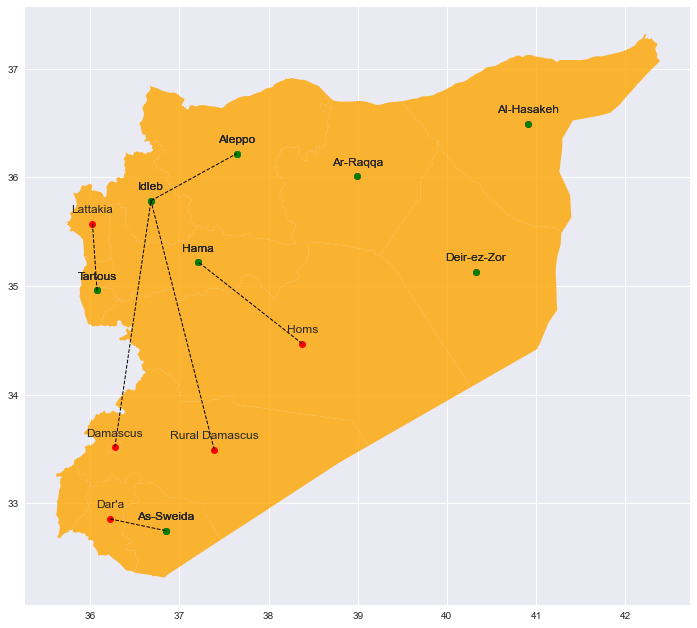

In [332]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )


for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")